In [1]:
from keras.models import load_model

E:\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model = load_model('my_model.h5')

E:\Anaconda3\envs\tensorflow\lib\site-packages\keras\models.py:291: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense_1 (Dense)              (None, 32)                65568     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 23,653,346
Trainable params: 23,600,226
Non-trainable params: 53,120
_________________________________________________________________


In [21]:
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input
import numpy as np

def prep_img(img_paths):
    
    imgs = [image.load_img(img,target_size=(224,224)) for img in img_paths]   #target size is imp!
    img_arr = np.array( [image.img_to_array(img) for img in imgs] )
    # no need to us expand array 
    preprocessed = preprocess_input(img_arr)
    return preprocessed


import os
img_dir = 'test_images'
filenames = ['test1.jpg','test2.jpg','test3.jpg','test4.jpg','test5.jpg']
img_paths = [os.path.join(img_dir,file) for file in filenames]

data = prep_img(img_paths)
pred = model.predict(data)

pred = (pred>0.5) #set thres 

i=1
s=[]
for p in pred:
  
  if p[0]==True:
    s.append('RURAL')
  if p[1]==True:
    s.append('URBAN')
  i = i+1
print(s)

['URBAN', 'RURAL', 'RURAL', 'URBAN', 'RURAL']


URBAN


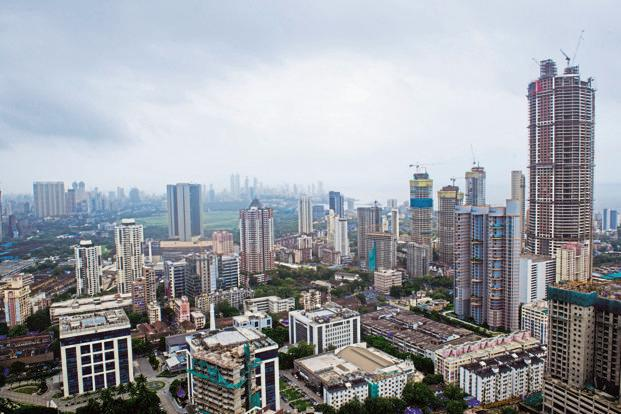

RURAL


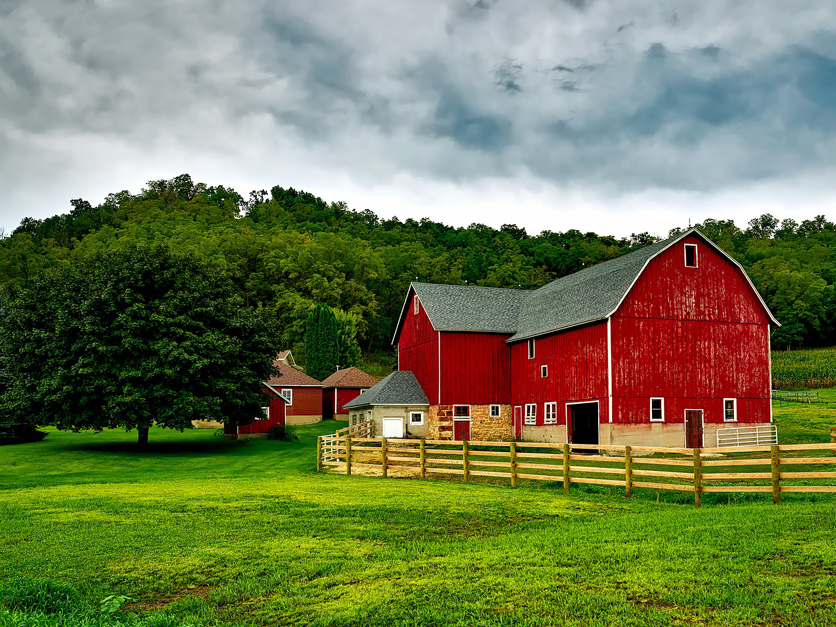

RURAL


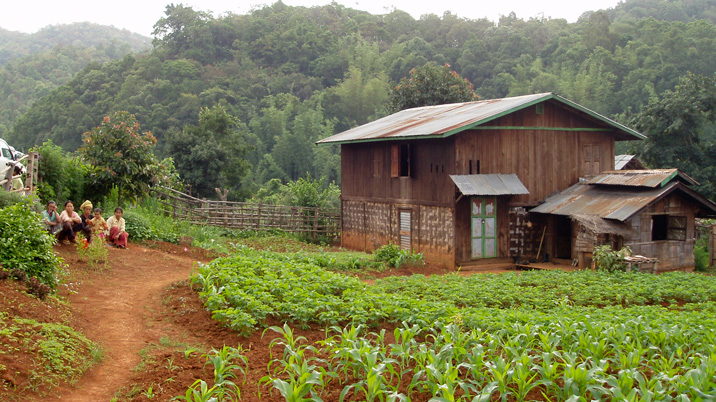

URBAN


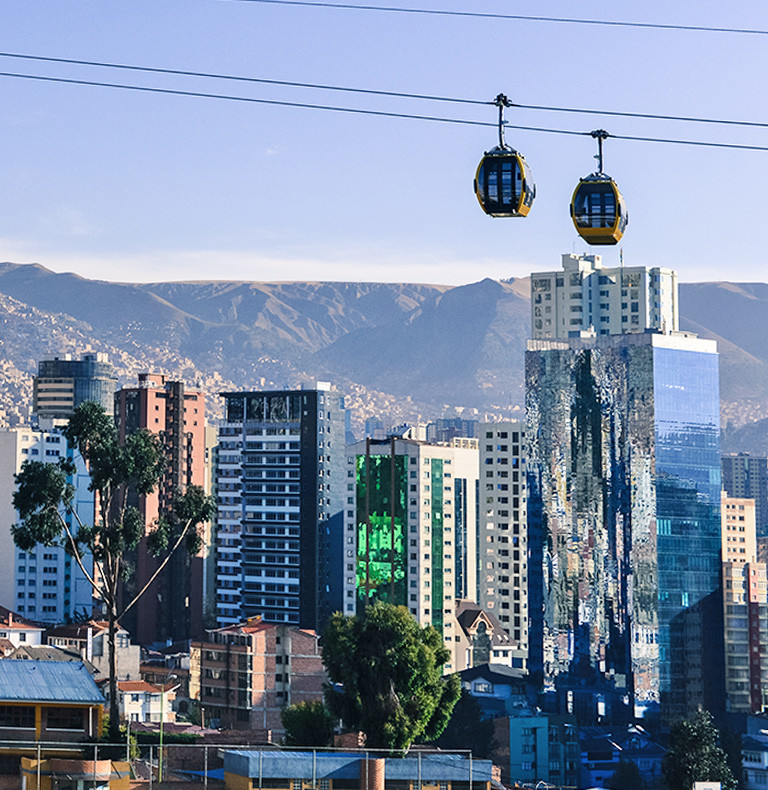

RURAL


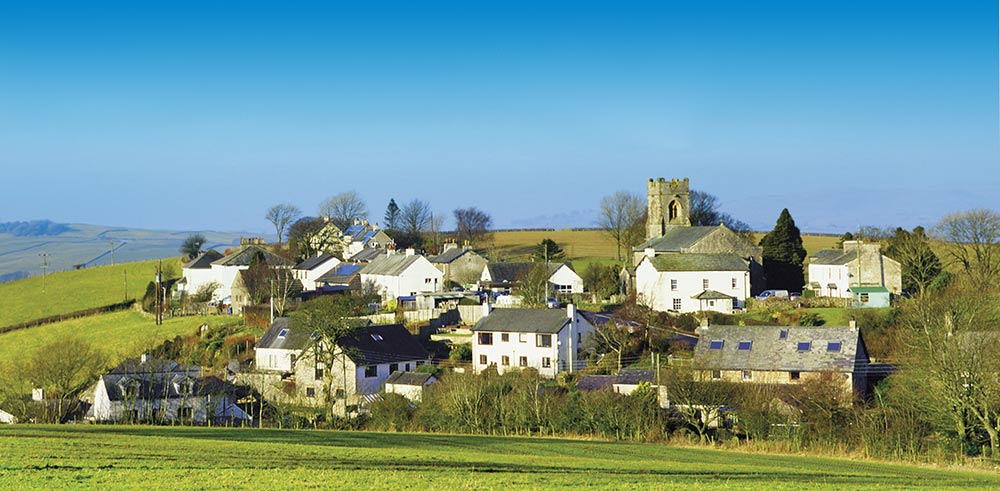

In [22]:
img_paths
from IPython.display import Image, display
for i,img in enumerate(img_paths):
    print(s[i])
    display(Image(img))